In [129]:
import random
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Ridge, Lasso

from matplotlib import pyplot as plt

In [130]:
# 1차 선형 데이터
def get_linear_data():
    np.random.seed(42)
    m = 20
    X = 3 * np.random.rand(m, 1) # 표준정규분포로부터 샘플링된 난수를 반환
    y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
    X_new = np.linspace(0, 3, 100).reshape(100, 1)

    return X, y, X_new # 학습용 X, y, 예측용 X_new

In [131]:
# 2차식 비선형 데이터
def get_non_linear_data():
    np.random.seed(42)
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

    X_new = np.linspace(-3, 3, 100).reshape(100, 1)

    return X, y, X_new # 학습용 X, y, 예측용 X_new

In [132]:
X, y, X_new = get_linear_data()
# X, y, X_new = get_non_linear_data()

In [133]:
# 선형 회귀 모델 실행
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # weight, bias

(array([0.97573667]), array([[0.3852145]]))

In [134]:
# 확률적 회귀 모델 실행
# max_iter : 학습 반복 횟수(epoch 수)
# tol : 학습 중단 시점
# eta0=lr, eta0 값을 0.00001까지 줄여서 돌리면, 별로 학습되지 않는 것을 확인 할 수 있다.
sgd_reg = SGDRegressor(max_iter=1000, tol=0.0001, eta0=0.01, penalty=None)
sgd_reg.fit(X, y)
sgd_reg.intercept_, sgd_reg.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.77340779]), array([0.49812012]))

In [135]:
sgd_reg2 = SGDRegressor(max_iter=1000, tol=0.0001, eta0=0.00001, penalty=None)
sgd_reg2.fit(X, y)
sgd_reg2.intercept_, sgd_reg2.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


(array([0.03256464]), array([0.05124771]))

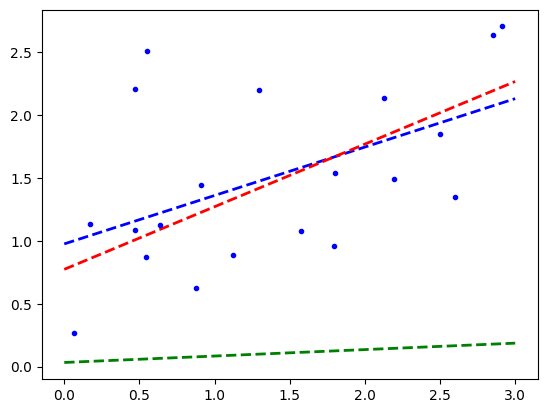

In [136]:
# 선형 회귀와 확률적 회귀 모델의 결과를 시각화 하여 비교해본다
lin_y_new = lin_reg.predict(X_new)
plt.plot(X_new, lin_y_new, 'b--', linewidth=2)

sgd_y_new = sgd_reg.predict(X_new)
plt.plot(X_new, sgd_y_new, 'r--', linewidth=2)

sgd_y_new2 = sgd_reg2.predict(X_new)
plt.plot(X_new, sgd_y_new2, 'g--', linewidth=2)

plt.plot(X, y, 'b.', linewidth=3)

plt.show()

In [137]:
X, y, X_new = get_non_linear_data()
std = StandardScaler()
poly_features = PolynomialFeatures(degree=10, include_bias=False) # 10차 다항식 회귀 모델
X_poly = poly_features.fit_transform(X) # 입력값을 10차 다항식으로 변환시켜준다.
X_poly = std.fit_transform(X_poly) # StandardScaler 스케일링 적용

# 위에서 학습용 X로 fit을 이미 실행했기 때문에, X_new에는 transform만 한다.
X_new_poly = poly_features.transform(X_new)
X_new_poly = std.fit_transform(X_new_poly)

# scaling을 하지 않고 돌려보면 그래프가 재밌어진다. 값의 범위가 들쭉날쭉해지면서 학습이 이상해지나봄

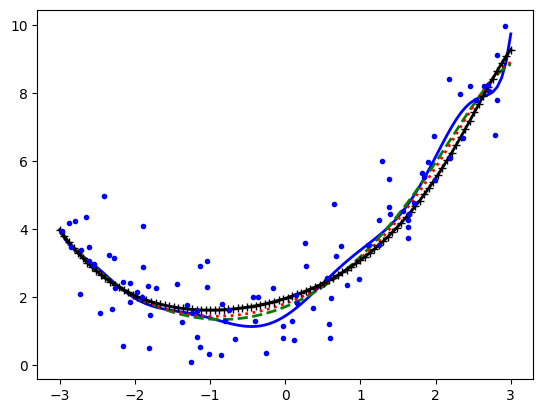

In [138]:
for alpha, style in zip((0, 1, 3, 9), ("b-", "g--", "r:", "k-+")):
  ridge_regression = Ridge(alpha=alpha).fit(X_poly, y)
  y_new_poly = ridge_regression.predict(X_new_poly)

  plt.plot(X_new, y_new_poly, style, linewidth=2)

plt.plot(X, y, "b.", linewidth=3)
plt.show()

<ipython-input-139-c9b3dd710e93>:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_regression = Lasso(alpha=alpha).fit(X_poly, y)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.802e+01, tolerance: 5.269e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


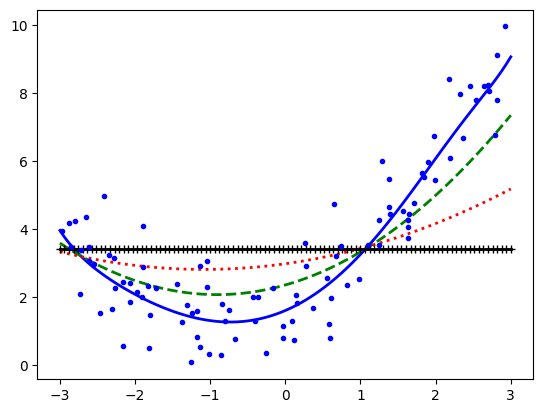

In [139]:
for alpha, style in zip((0, 0.5, 1, 2), ("b-", "g--", "r:", "k-+")):
  lasso_regression = Lasso(alpha=alpha).fit(X_poly, y)
  y_new_poly = lasso_regression.predict(X_new_poly)

  plt.plot(X_new, y_new_poly, style, linewidth=2)

plt.plot(X, y, "b.", linewidth=3)
plt.show()